In [238]:
import math
import numpy as np
import pywt
import cv2
import matplotlib.pyplot as plt
import mahotas as mh

In [307]:
tampered = cv2.imread("data/test_input/111.jpg", cv2.IMREAD_GRAYSCALE)
real = cv2.imread("data/test_ground-truth/111.jpg", cv2.IMREAD_GRAYSCALE)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
tampered_cleaned = clahe.apply(tampered)

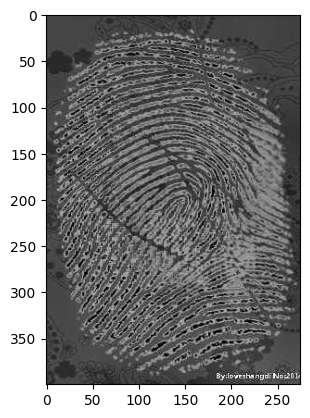

In [304]:
plt.imshow(tampered_cleaned,cmap= 'gray')

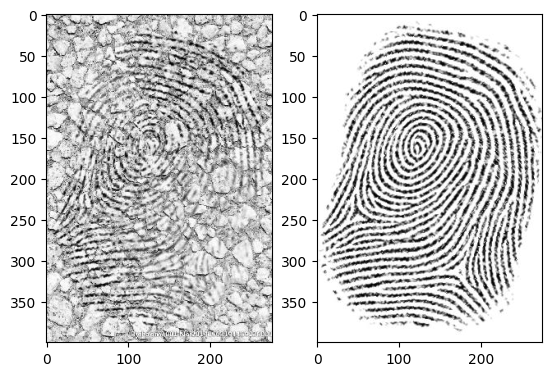

In [308]:
plt.subplot(1,2,1)
plt.imshow(tampered, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(real, cmap='gray')

In [309]:
f_transform = np.fft.fft2(tampered)
f_shift = np.fft.fftshift(f_transform)
f_plot = 20 * np.log(np.abs(f_shift) + 1)

f_transform1 = np.fft.fft2(real)
f_shift1 = np.fft.fftshift(f_transform1)
f_plot1 = 20 * np.log(np.abs(f_shift1) + 1)


f_transform2 = np.fft.fft2(tampered_cleaned)
f_shift2 = np.fft.fftshift(f_transform2)
f_plot2 = 20 * np.log(np.abs(f_shift2) + 1)

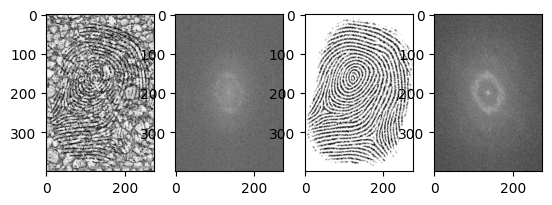

In [310]:
plt.subplot(1,4,1)
plt.imshow(tampered_cleaned, cmap = 'gray')

plt.subplot(1,4,2)
plt.imshow(f_plot2, cmap='gray')

plt.subplot(1,4,3)
plt.imshow(real, cmap='gray')

plt.subplot(1,4,4)
plt.imshow(f_plot1, cmap='gray')

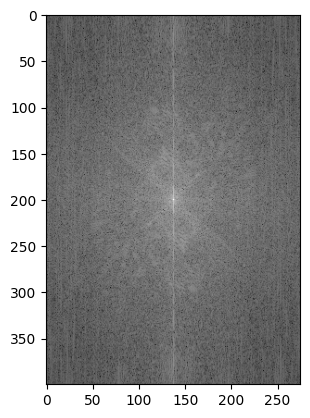

In [288]:
plt.imshow(f_plot2, cmap='gray')

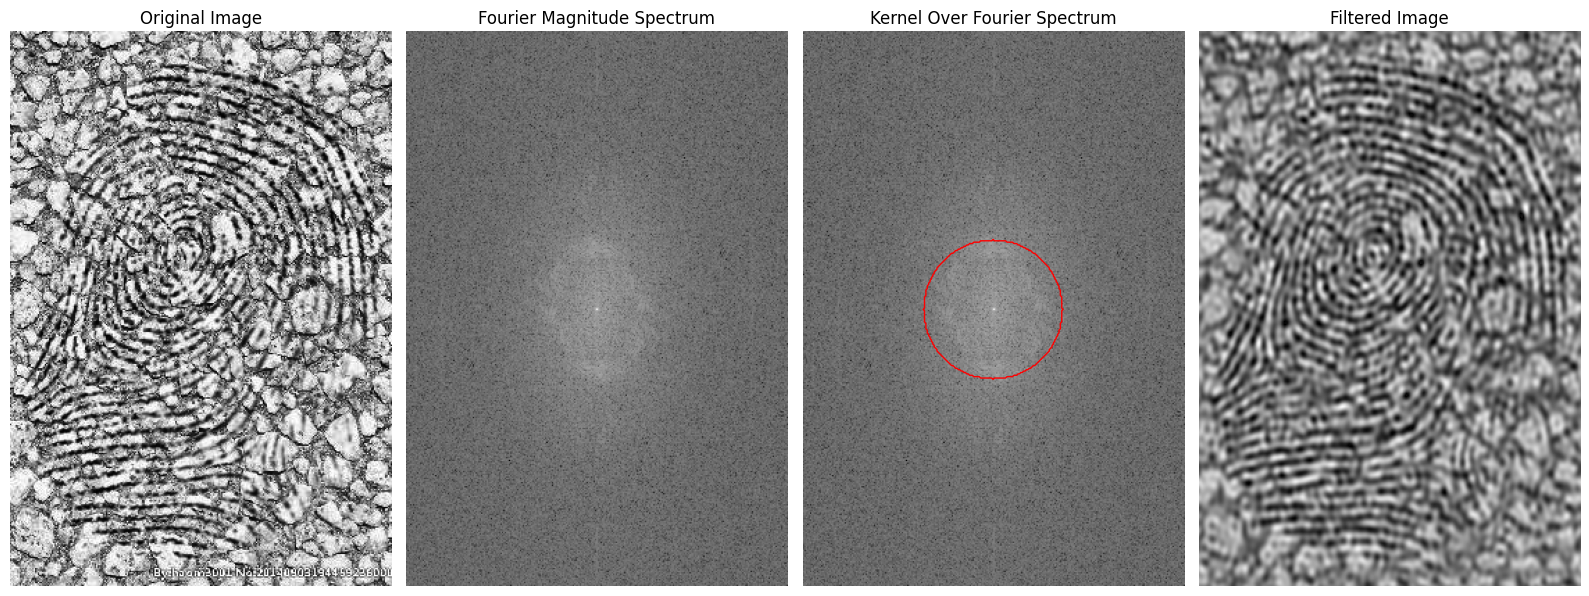

In [313]:
rows, cols = tampered_cleaned.shape

# Perform Fourier Transform
f_transform = np.fft.fft2(tampered_cleaned)
f_shift = np.fft.fftshift(f_transform)  # Shift the zero frequency component to the center

# Create a circular kernel
center_x, center_y = cols // 2, rows // 2  # Center of the frequency domain
radius = 50  # Radius of the circle
Y, X = np.ogrid[:rows, :cols]
distance_from_center = np.sqrt((X - center_x) ** 2 + (Y - center_y) ** 2)
circular_mask = distance_from_center <= radius

# Apply the mask
filtered_f_shift = f_shift * circular_mask

# Perform Inverse Fourier Transform
filtered_f_ishift = np.fft.ifftshift(filtered_f_shift)
filtered_image = np.fft.ifft2(filtered_f_ishift)
filtered_image = np.abs(filtered_image)  # Take magnitude to get real part

# Plot the results
plt.figure(figsize=(16, 8))

# Original Image
plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(tampered_cleaned, cmap='gray')
plt.axis('off')

# Fourier Transform Magnitude Spectrum
plt.subplot(1, 4, 2)
plt.title("Fourier Magnitude Spectrum")
plt.imshow(np.log(1 + np.abs(f_shift)), cmap='gray')
plt.axis('off')

# Fourier Transform with Kernel Overlay
plt.subplot(1, 4, 3)
plt.title("Kernel Over Fourier Spectrum")
plt.imshow(np.log(1 + np.abs(f_shift)), cmap='gray')
plt.contour(circular_mask, colors='red', linewidths=1)  # Overlay the mask
plt.axis('off')

# Filtered Image
plt.subplot(1, 4, 4)
plt.title("Filtered Image")
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


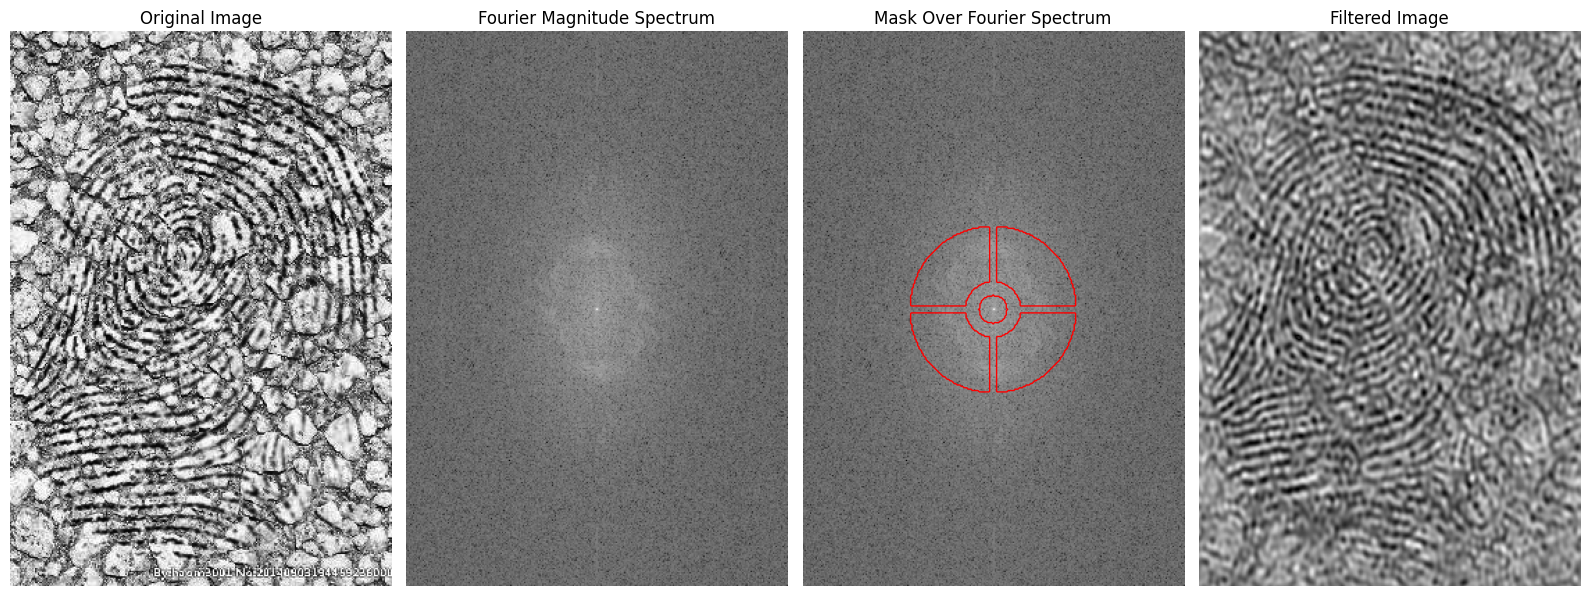

In [311]:
rows, cols = tampered_cleaned.shape

# Perform Fourier Transform
f_transform = np.fft.fft2(tampered_cleaned)
f_shift = np.fft.fftshift(f_transform)  # Shift the zero frequency component to the center

# Create three-ring mask
center_x, center_y = cols // 2, rows // 2  # Center of the frequency domain
Y, X = np.ogrid[:rows, :cols]
distance_from_center = np.sqrt((X - center_x) ** 2 + (Y - center_y) ** 2)

# Define radii for the rings
radius_small = 10
radius_middle = 20
radius_large = 60

# Construct the three-ring mask
mask = np.zeros((rows, cols), dtype=bool)
mask[distance_from_center <= radius_small] = True  # Inner ring (retain)
mask[(radius_middle <= distance_from_center) & (distance_from_center <= radius_large)] = True  # Outer ring (retain)

# Remove horizontal and vertical lines outside the smallest ring
line_width = 2  # Define the thickness of the line to remove
horizontal_line = (np.abs(Y - center_y) <= line_width) & (distance_from_center > radius_small)
vertical_line = (np.abs(X - center_x) <= line_width) & (distance_from_center > radius_small)
mask[horizontal_line | vertical_line] = False

# Apply the mask
filtered_f_shift = f_shift * mask

# Perform Inverse Fourier Transform
filtered_f_ishift = np.fft.ifftshift(filtered_f_shift)
filtered_image = np.fft.ifft2(filtered_f_ishift)
filtered_image = np.abs(filtered_image)  # Take magnitude to get real part

# Plot the results
plt.figure(figsize=(16, 8))

# Original Image
plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(tampered_cleaned, cmap='gray')
plt.axis('off')

# Fourier Transform Magnitude Spectrum
plt.subplot(1, 4, 2)
plt.title("Fourier Magnitude Spectrum")
plt.imshow(np.log(1 + np.abs(f_shift)), cmap='gray')
plt.axis('off')

# Fourier Transform with Mask Overlay
plt.subplot(1, 4, 3)
plt.title("Mask Over Fourier Spectrum")
plt.imshow(np.log(1 + np.abs(f_shift)), cmap='gray')
plt.contour(mask, colors='red', linewidths=1)  # Overlay the mask
plt.axis('off')

# Filtered Image
plt.subplot(1, 4, 4)
plt.title("Filtered Image")
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


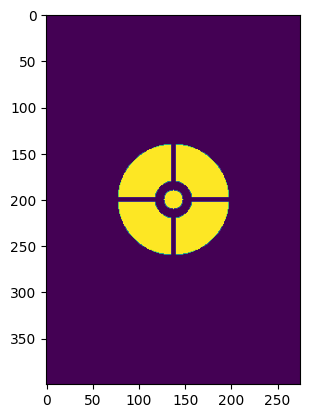

In [312]:
plt.imshow(mask)

In [ ]:
import numpy as np
from scipy import signal, ndimage
import cv2

def enhance_fingerprint(image):
    """Preprocessing steps specific to fingerprint images"""
    # Convert to grayscale if needed
    if len(image.shape) > 2:
        img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        img = image.copy()
    
    # Normalize intensity
    img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
    
    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img = clahe.apply(img)
    
    # Remove noise using Gaussian blur
    img = cv2.GaussianBlur(img, (3,3), 0)
    
    return img

def fingerprint_pst(input_image, strength=0.7, warp=0.3, ridge_freq=None):
    """Modified PST optimized for fingerprint ridge detection"""
    # Preprocess the image
    img = enhance_fingerprint(input_image)
    
    # Convert to float
    img = img.astype(np.float32) / 255.0
    
    # Apply FFT
    freq = np.fft.fft2(img)
    freq_shift = np.fft.fftshift(freq)
    
    # Create frequency grid
    rows, cols = img.shape
    crow, ccol = rows//2, cols//2
    u = np.linspace(-1, 1, cols)
    v = np.linspace(-1, 1, rows)
    [U, V] = np.meshgrid(u, v)
    
    # Create frequency-based filters
    R = np.sqrt(U**2 + V**2)
    
    # Fingerprint-specific bandpass filter
    if ridge_freq is None:
        ridge_freq = estimate_ridge_frequency(img)
    
    bandwidth = 0.4  # Adjust based on ridge characteristics
    bandpass = np.exp(-(R - ridge_freq)**2 / (2 * bandwidth**2))
    
    # Modified phase mask for ridge enhancement
    phase_mask = np.exp(1j * strength * R * np.exp(-R/warp)) * bandpass
    
    # Apply phase transform with fingerprint-specific modifications
    result = freq_shift * phase_mask
    result = np.fft.ifftshift(result)
    result = np.fft.ifft2(result)
    
    # Get phase angle
    phase = np.angle(result)
    
    # Enhanced normalization for ridge visibility
    phase = (phase - np.min(phase)) / (np.max(phase) - np.min(phase))
    
    return phase

def estimate_ridge_frequency(img, block_size=16):
    """Estimate average ridge frequency in the fingerprint"""
    # Calculate gradients
    gx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    gy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    
    # Calculate gradient magnitude
    magnitude = np.sqrt(gx**2 + gy**2)
    
    # Calculate local frequencies in blocks
    frequencies = []
    for i in range(0, img.shape[0]-block_size, block_size):
        for j in range(0, img.shape[1]-block_size, block_size):
            block = magnitude[i:i+block_size, j:j+block_size]
            if np.std(block) > 0:  # Only consider blocks with variation
                freq = np.fft.fftfreq(block_size)[:block_size//2]
                spectrum = np.abs(np.fft.fft(np.mean(block, axis=1)))[:block_size//2]
                if len(spectrum) > 0:
                    peak_freq = abs(freq[np.argmax(spectrum[1:]) + 1])
                    frequencies.append(peak_freq)
    
    # Return median frequency if found, else default value
    return np.median(frequencies) if frequencies else 0.1

def detect_fingerprint_features(image, threshold=0.4):
    """Detect and enhance fingerprint features"""
    # Apply modified PST
    pst_result = fingerprint_pst(image)
    
    # Apply adaptive thresholding
    binary = cv2.adaptiveThreshold(
        (pst_result * 255).astype(np.uint8),
        255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY,
        11,
        2
    )
    
    # Morphological operations to clean up the result
    kernel = np.ones((3,3), np.uint8)
    binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
    
    return binary

enhanced_features = detect_fingerprint_features(tampered)



In [257]:
def cart2pol(x, y):
     theta = np.arctan2(y, x)
     rho = np.hypot(x, y)
     return (theta, rho)    
def PST(I,LPF,Phase_strength,Warp_strength, Threshold_min, Threshold_max, Morph_flag):
     L=0.5
     x = np.linspace(-L, L, I.shape[0])
     y = np.linspace(-L, L, I.shape[1])
     [X1, Y1] =(np.meshgrid(x, y))
     X=X1.T
     Y=Y1.T
     [THETA,RHO] = cart2pol(X,Y)
     print(THETA.shape)
     print(RHO.shape)
     plt.imshow(THETA)
     plt.show()


     plt.imshow(RHO)
     plt.show()

 
     # Apply localization kernel to the original image to reduce noise
     Image_orig_f=((np.fft.fft2(I)))  
     expo = np.fft.fftshift(np.exp(-np.power((np.divide(RHO, math.sqrt((LPF**2)/np.log(2)))),2)))
     Image_orig_filtered=np.real(np.fft.ifft2((np.multiply(Image_orig_f,expo))))
     # Constructing the PST Kernel
     PST_Kernel_1=np.multiply(np.dot(RHO,Warp_strength), np.arctan(np.dot(RHO,Warp_strength)))-0.5*np.log(1+np.power(np.dot(RHO,Warp_strength),2))
     PST_Kernel=PST_Kernel_1/np.max(PST_Kernel_1)*Phase_strength
     # Apply the PST Kernel
     temp=np.multiply(np.fft.fftshift(np.exp(-1j*PST_Kernel)),np.fft.fft2(Image_orig_filtered))
     Image_orig_filtered_PST=np.fft.ifft2(temp)

     # Calculate phase of the transformed image
     PHI_features=np.angle(Image_orig_filtered_PST)
     
     if Morph_flag ==0:
         out=PHI_features
     else:
         #   find image sharp transitions by thresholding the phase
         features = np.zeros((PHI_features.shape[0],PHI_features.shape[1]))
         features[PHI_features> Threshold_max] = 1 # Bi-threshold decision
         features[PHI_features< Threshold_min] = 1 # as the output phase has both positive and negative values
         features[I<(np.amax(I)/20)]=0 # Removing edges in the very dark areas of the image (noise)
   
         # apply binary morphological operations to clean the transformed image 
         out = features
         out = mh.thin(out, 1)
         out = mh.bwperim(out, 4)
         out = mh.thin(out, 1)
         out = mh.erode(out, np.ones((1, 1))); 
   
     return (out, PST_Kernel)


(400, 275)
(400, 275)


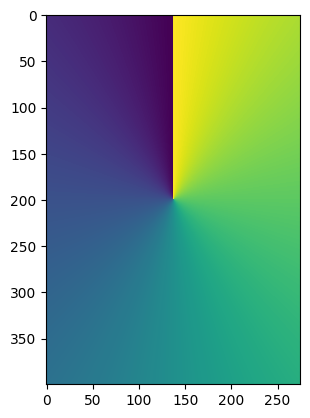

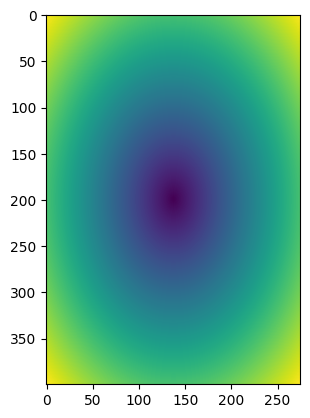

In [260]:
LPF = 0.1 # Gaussian Low Pass Filter
# PST parameters
Phase_strength = 0.48 
Warp_strength= 12.14
# Thresholding parameters (for post processing after the edge is computed)
Threshold_min = -1
Threshold_max = 0.0019
# [] Choose to compute the analog or digital edge,
Morph_flag =1 # [] To compute analog edge, set Morph_flag=0 and to compute digital edge, set Morph_flag=1

 
Edge, PST_Kernel = PST(tampered_cleaned, LPF, Phase_strength, Warp_strength, Threshold_min, Threshold_max, Morph_flag)
Edge = 1 - Edge.astype(int)

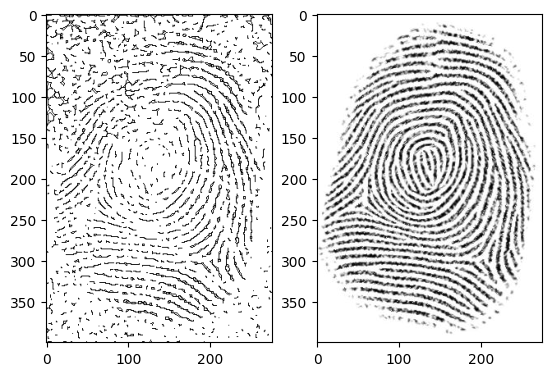

In [261]:
plt.subplot(1,2,1)
plt.imshow(Edge, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(real, cmap='gray')

## PST with wavelet transform

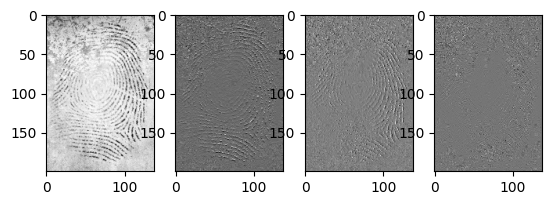

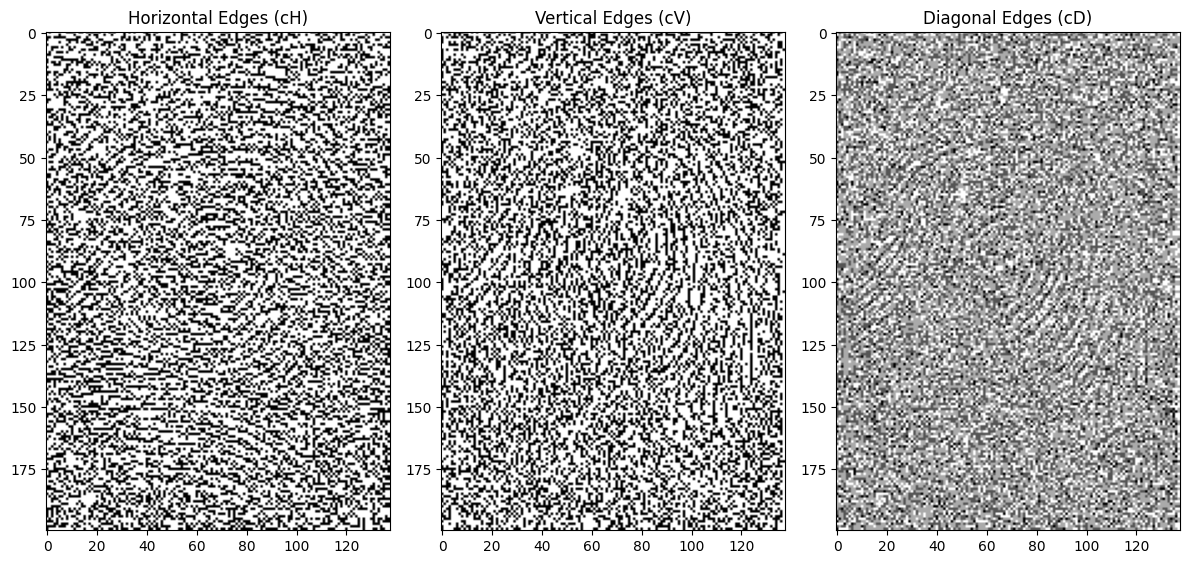

In [263]:
import math
import numpy as np
import pywt
import mahotas as mh
import matplotlib.pyplot as plt

# Define cartesian-to-polar coordinate conversion
def cart2pol(x, y):
    theta = np.arctan2(y, x)
    rho = np.hypot(x, y)
    return (theta, rho)

# Define PST function
def PST(I, LPF, Phase_strength, Warp_strength, Threshold_min, Threshold_max):
    L = 0.1
    x = np.linspace(-L, L, I.shape[0])
    y = np.linspace(-L, L, I.shape[1])
    [X1, Y1] = (np.meshgrid(x, y))
    X = X1.T
    Y = Y1.T
    [THETA, RHO] = cart2pol(X, Y)

    # Localization kernel to reduce noise
    Image_orig_f = (np.fft.fft2(I))
    expo = np.fft.fftshift(np.exp(-np.power((np.divide(RHO, math.sqrt((LPF**2) / np.log(2)))), 2)))
    Image_orig_filtered = np.real(np.fft.ifft2((np.multiply(Image_orig_f, expo))))

    # Constructing the PST Kernel
    PST_Kernel_1 = np.multiply(np.dot(RHO, Warp_strength), np.arctan(np.dot(RHO, Warp_strength))) - \
                   0.5 * np.log(1 + np.power(np.dot(RHO, Warp_strength), 2))
    PST_Kernel = PST_Kernel_1 / np.max(PST_Kernel_1) * Phase_strength

    # Apply the PST Kernel
    temp = np.multiply(np.fft.fftshift(np.exp(-1j * PST_Kernel)), np.fft.fft2(Image_orig_filtered))
    Image_orig_filtered_PST = np.fft.ifft2(temp)

    # Calculate phase of the transformed image
    PHI_features = np.angle(Image_orig_filtered_PST)

    # Thresholding for edge detection
    features = np.zeros((PHI_features.shape[0], PHI_features.shape[1]))
    features[PHI_features > Threshold_max] = 1
    features[PHI_features < Threshold_min] = 1

    return features

# Define Wavelet Transform + PST function (Edge-only output)
def Wavelet_PST_Edges(I, wavelet='db1', LPF=0.21, Phase_strength=0.48, Warp_strength=12.14, 
                      Threshold_min=-1, Threshold_max=0.0019):
    # Step 1: Perform wavelet decomposition
    coeffs2 = pywt.dwt2(I, wavelet)
    cA, (cH, cV, cD) = coeffs2  # Approximation and detail coefficients
    plt.subplot(1,4,1)
    plt.imshow(cA, cmap = 'gray')

    plt.subplot(1,4,2)
    plt.imshow(cH, cmap='gray')

    plt.subplot(1,4,3)
    plt.imshow(cV, cmap='gray')

    plt.subplot(1,4,4)
    plt.imshow(cD, cmap='gray')
    # Step 2: Apply PST to detail coefficients
    cH_edges = PST(cH, LPF, Phase_strength, Warp_strength, Threshold_min, Threshold_max)
    cV_edges = PST(cV, LPF, Phase_strength, Warp_strength, Threshold_min, Threshold_max)
    cD_edges = PST(cD, LPF, Phase_strength, Warp_strength, Threshold_min, Threshold_max)

    return cH_edges, cV_edges, cD_edges



# Apply Wavelet + PST
cH_edges, cV_edges, cD_edges = Wavelet_PST_Edges(tampered/ 255.0)

c_final = cH_edges + cV_edges + cD_edges

# Display the results
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.title("Horizontal Edges (cH)")
plt.imshow(cH_edges, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Vertical Edges (cV)")
plt.imshow(cV_edges, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Diagonal Edges (cD)")
plt.imshow(c_final, cmap='gray')

plt.tight_layout()
plt.show()


## PST with DCT
Discrete cosine transform

In [227]:
import numpy as np
import cv2
import mahotas as mh
import math
import matplotlib.pyplot as plt

# Define cartesian-to-polar coordinate conversion
def cart2pol(x, y):
    theta = np.arctan2(y, x)
    rho = np.hypot(x, y)
    return (theta, rho)

# Define PST function
def PST(I, LPF, Phase_strength, Warp_strength, Threshold_min, Threshold_max):
    L = 0.5
    x = np.linspace(-L, L, I.shape[0])
    y = np.linspace(-L, L, I.shape[1])
    [X1, Y1] = (np.meshgrid(x, y))
    X = X1.T
    Y = Y1.T
    [THETA, RHO] = cart2pol(X, Y)

    # Localization kernel to reduce noise
    Image_orig_f = (np.fft.fft2(I))
    expo = np.fft.fftshift(np.exp(-np.power((np.divide(RHO, math.sqrt((LPF**2) / np.log(2)))), 2)))
    Image_orig_filtered = np.real(np.fft.ifft2((np.multiply(Image_orig_f, expo))))

    # Constructing the PST Kernel
    PST_Kernel_1 = np.multiply(np.dot(RHO, Warp_strength), np.arctan(np.dot(RHO, Warp_strength))) - \
                   0.5 * np.log(1 + np.power(np.dot(RHO, Warp_strength), 2))
    PST_Kernel = PST_Kernel_1 / np.max(PST_Kernel_1) * Phase_strength

    # Apply the PST Kernel
    temp = np.multiply(np.fft.fftshift(np.exp(-1j * PST_Kernel)), np.fft.fft2(Image_orig_filtered))
    Image_orig_filtered_PST = np.fft.ifft2(temp)

    # Calculate phase of the transformed image
    PHI_features = np.angle(Image_orig_filtered_PST)

    # Thresholding for edge detection
    features = np.zeros((PHI_features.shape[0], PHI_features.shape[1]))
    features[PHI_features > Threshold_max] = 1
    features[PHI_features < Threshold_min] = 1

    return features

# Define DCT + PST function
def DCT_PST(I, LPF=0.21, Phase_strength=0.48, Warp_strength=12.14, 
                      Threshold_min=-1, Threshold_max=0.0019):
    # Step 1: Apply DCT to the image
    dct_transform = cv2.dct(np.float32(I))

    # Step 2: Separate low- and high-frequency components
    rows, cols = dct_transform.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), dtype=np.uint8)
    r = min(rows, cols) // 4  # Radius for separating low/high frequencies
    cv2.circle(mask, (ccol, crow), r, 1, thickness=-1)

    low_freq = dct_transform * mask  # Low-frequency part
    high_freq = dct_transform * (1 - mask)  # High-frequency part

    # Step 3: Apply PST to high-frequency part
    high_freq_img = cv2.idct(high_freq)  # Convert back to spatial domain
    pst_high_freq = PST(high_freq_img, LPF, Phase_strength, Warp_strength, Threshold_min, Threshold_max)

    # Step 4: Recombine low-frequency and enhanced high-frequency components
    pst_high_freq_dct = cv2.dct(np.float32(pst_high_freq))  # Convert PST-enhanced back to frequency domain
    combined_dct = low_freq + pst_high_freq_dct

    # Step 5: Apply inverse DCT to get the final image
    enhanced_image = cv2.idct(combined_dct)

    return enhanced_image, pst_high_freq

# Example usage

# # Load a sample image
# image = cv2.imread("forgeries.png", cv2.IMREAD_GRAYSCALE)
# image = image / 255.0  # Normalize image
tampered = tampered / 255.0

# Apply DCT + PST
enhanced_image, pst_edges = DCT_PST(tampered)

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Enhanced Image (DCT + PST)")
plt.imshow(enhanced_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Edges from PST on High Frequency")
plt.imshow(pst_edges, cmap='gray')

plt.tight_layout()
plt.show()


error: OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/core/src/dxt.cpp:4320: error: (-213:The function/feature is not implemented) Odd-size DCT's are not implemented in function 'apply'


In [264]:
import numpy as np
import cv2
from skimage.filters import sobel
from skimage.measure import shannon_entropy

def adaptive_pst_params(image, base_strength=0.5, base_stretch=0.5):
    """
    Dynamically adjust PST parameters based on image content.
    
    Parameters:
        image (ndarray): Input grayscale image (2D array).
        base_strength (float): Base value for phase kernel strength.
        base_stretch (float): Base value for stretch factor.
    
    Returns:
        phase_strength (float): Adaptive phase kernel strength.
        stretch_factor (float): Adaptive stretch factor.
    """
    # Convert image to grayscale if necessary
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate Shannon entropy (information content)
    entropy = shannon_entropy(image)

    # Compute edge density using Sobel filter
    edges = sobel(image)
    edge_density = np.sum(edges > edges.mean()) / edges.size

    # Adaptive parameter tuning
    phase_strength = base_strength + 0.1 * entropy  # Higher entropy -> stronger phase kernel
    stretch_factor = base_stretch + 0.2 * edge_density  # Higher edge density -> higher stretch

    return phase_strength, stretch_factor


def apply_pst(image, phase_strength, stretch_factor):
    """
    Apply Phase Stretch Transform (PST) with given parameters.
    
    Parameters:
        image (ndarray): Input grayscale image (2D array).
        phase_strength (float): Phase kernel strength.
        stretch_factor (float): Stretch factor for phase kernel.

    Returns:
        edges (ndarray): PST edge-enhanced output.
    """
    # Step 1: Convert to frequency domain
    f_image = np.fft.fft2(image)
    f_shifted = np.fft.fftshift(f_image)

    # Step 2: Create phase kernel
    rows, cols = image.shape
    x = np.linspace(-1, 1, cols)
    y = np.linspace(-1, 1, rows)
    X, Y = np.meshgrid(x, y)
    r = np.sqrt(X**2 + Y**2)
    phase_kernel = np.exp(-stretch_factor * r**2) * np.sin(2 * np.pi * phase_strength * r)

    # Step 3: Apply phase kernel in frequency domain
    f_modified = f_shifted * np.exp(1j * phase_kernel)
    f_result = np.fft.ifftshift(f_modified)

    # Step 4: Transform back to spatial domain
    result = np.abs(np.fft.ifft2(f_result))

    # Step 5: Extract edges (enhanced by PST)
    edges = sobel(result)
    return edges


# Example usage
# if __name__ == "__main__":
#     # Load and preprocess image
#     image = cv2.imread("sample_image.jpg", cv2.IMREAD_GRAYSCALE)
#     image = cv2.resize(image, (256, 256))  # Resize for testing

#     # Get adaptive PST parameters]
#tampered = cv2.resize(tampered, (256, 256))
phase_strength, stretch_factor = adaptive_pst_params(tampered_cleaned)
print(f"Adaptive Parameters - Phase Strength: {phase_strength}, Stretch Factor: {stretch_factor}")


edges = apply_pst(tampered, phase_strength, stretch_factor)


Adaptive Parameters - Phase Strength: 1.2624727188739486, Stretch Factor: 0.5789509090909091


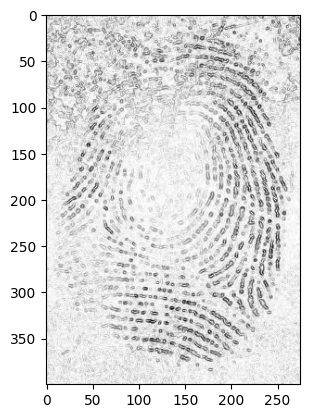

In [265]:
plt.imshow(1 - edges, cmap = 'gray')